# K-Means Clustering

Method
---
1) For k = 3 clusters (example), randomly select k = 3 samples in the feature set and label these nodes
2) Determine the Euclidean distance between the nodes and all of the feature set distances
3) Sort by distance and select closest N features (N ~ n_features / k); these closest features are now a cluster
4) Take the mean of these clusters and set the node = this mean
5) Iterate until convergence or max_iter

Draw-backs
---
K-means with Euclidean distances assumes that a cluster is centered at the node with a constant radius (I think that's what he said)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

import pandas as pd

style.use('fivethirtyeight')

import numpy as np
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 12,12

In [225]:
# X   = np.array([[1,2],
#                 [1.5, 1.8],
#                 [5, 8],
#                 [8,8],
#                 [1,0.6],
#                 [9,11]])

import random
width   = 10.0
nPts    = 1e3
X       = np.random.normal(0,1,(nPts,2))
for k in range(X.shape[0]):
    X[k,0]  += random.randint(-1, 1)*width
    X[k,1]  += random.randint(-1, 1)*width

/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [226]:
# X_train, X_test, y_train, y_test  = cross_validation.train_test_split(X, test_size=tsize, random_state=rstate)
kmeans0 = KMeans(n_clusters = 9)
kmeans0.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=9, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [227]:
centroids   = kmeans0.cluster_centers_
labels      = kmeans0.labels_

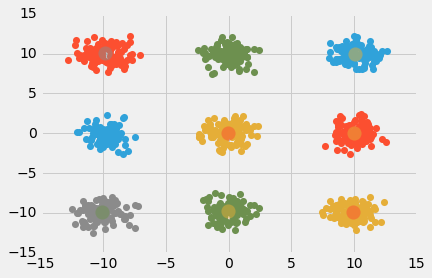

In [228]:
colors      = 10*plt.rcParams['axes.color_cycle']

plt.scatter(X.T[0], X.T[1], linewidth=0)

for k in range(X.shape[0]):
    plt.scatter(X[k][0], X[k][1], c=colors[labels[k]], s=50, linewidth=0)

for k in range(centroids.shape[0]):
    plt.scatter(centroids[k,0], centroids[k,1], color=colors[labels[k]], s=200, alpha=0.5, linewidth=0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


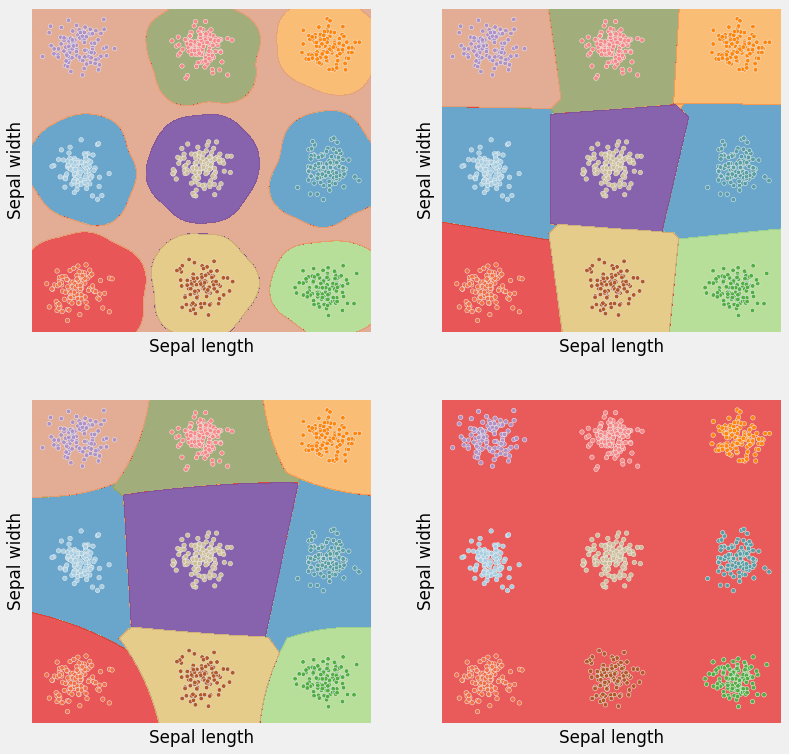

In [229]:
from sklearn.svm import SVC
plt.figure(figsize=(12,12))
for k, kernel in enumerate(['rbf', 'linear', 'poly', 'sigmoid']):
    svm = SVC(kernel=kernel)
    print svm.fit(X, labels)

    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2,2,k+1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

# My attempt at developing a KMeans Clustering Algorithm Prior to Sentdex
```python
class kmeans0():
    
    def __init__(self, k=3, eps = 1e-3, visualize=False):
        if visualize:
            self.fig    = plt.figure()
            self.ax     = fig.add_subplot(111)
            
        self.k      = k
        self.eps    = eps
    
    def fit(self, data):
        def distance(position, center):
            return np.sum((position - center)**2.)
        
        def update_cluster_centers(distances):
            data_temp   = self.data.copy()
            clusters    = data_temp[where(distances)]
            self.cluster_centers_   = np.mean(clusters, axis=0)
        
        # data.shape = (nsamples, nfeatures)
        self.data   = data
        krand       = np.random.randint(0, self.data.shape[0], self.k)
        
        self.cluster_centers_   = data[krand]
        
        distances   = np.empty(self.data.shape[0], self.k)
        for i in range(self.k):
            distances[:,i] = distance(self.data, self.cluster_centers_[i])
        
        update_cluster_centers(distances)
    
    def predict(self, test_data):
        # test_data.shape = (nsamples, nfeatures)
        self.cluster_labels_ = (test_data - self.cluster_centers_).argmin(axis=0)
    
    def visualize(self, newdata=None):
        colors  = rcParams['axis.color_cycle']
        while len(colors) < self.k:
            colors  = colors + colors
        for i in self.data:
            ax.scatter()

```

---

---
# K-Means Clusting on the Titanic Data Set
https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls

Data Table Outline
---

    Pclass      = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    survival    = Survival (0 = No; 1 = Yes)
    name        = Name of Passenger
    sex         = Sex of Passenger
    age         = Age of Passenger
    sibsp       = Number of Siblings / Spouses Aboard
    parch       = Number of Parents / Children Aboard
    ticket      = Ticket Number
    fare        = Passenger Fare (British Pounds)
    cabin       = Cabin that the Passenger stayed in
    embarked    = Port of Embarkataion (C = Cherboug; Q = Queenstown; S = Southampton)
    boat        = Lifeboat
    body        = Body Identification Number
    home.dest   = Home/Destination

In [5]:
%matplotlib inline
import matplotlib.pyplot
from matplotlib import style

style.use('fivethirtyeight')

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation

In [6]:
df = pd.read_excel('titanic.xls')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
df[df.sex == 'male'].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,843.000000,843.000000,658.000000,843.000000,843.000000,842.000000,113.000000
mean,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.398230
std,0.811908,0.393310,14.280571,0.997928,0.708938,42.486877,95.035289
min,1.000000,0.000000,0.333300,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.876050,79.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,11.887500,155.000000
75%,3.000000,0.000000,39.000000,1.000000,0.000000,26.550000,255.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,322.000000


In [18]:
df[df.sex == 'female'].describe()

,pclass,survived,age,sibsp,parch,fare,body
count,466.000000,466.000000,388.000000,466.000000,466.000000,466.000000,8.000000
mean,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.625000
std,0.866181,0.445741,14.576995,1.101009,1.049579,63.292599,138.110657
min,1.000000,0.000000,0.166700,0.000000,0.000000,6.750000,7.000000
25%,1.000000,0.000000,19.000000,0.000000,0.000000,10.504175,52.750000
50%,2.000000,1.000000,27.000000,0.000000,0.000000,23.000000,133.500000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,55.331275,306.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,328.000000


In [31]:
df[(df.fare == 0)*(df.pclass == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"


In [33]:
df[(df.fare == 0)*(df.pclass == 2)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast
473,2,0,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,NaN,NaN,Belfast
528,2,0,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,NaN,NaN,Belfast


In [34]:
df[(df.fare == 0)*(df.pclass == 3)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN
898,3,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN
963,3,0,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,NaN,NaN
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,15,NaN,NaN


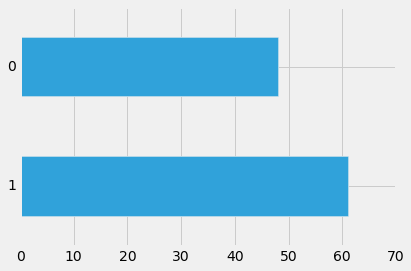

In [37]:
df[(df.age < 15)].survived.value_counts().plot(kind='barh')

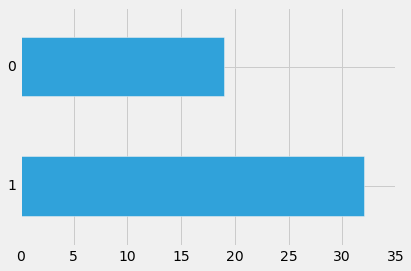

In [39]:
df[(df.age < 15)*(df.sex == 'female')].survived.value_counts().plot(kind='barh')

Note that `pclass`, `survived`, `age`, `sibsp`, `parch`, `ticket`, `fare`, `boat`, `body` are all numbers and can be interpretted easily by a clustering algorithm. Some of these numbers are not usefyl, such as `ticket`.

But, then there are labels that are not numeric, but very likley to be important, such as `sex` becuase women and children were technically preferred over men in the lifeboats.

So we need to convert the label `sex` to a numeric value.  
- It's probably easy enough to just map `sex` to a new column using a dictionary like `{'male'0, 'female':1}`
- Sentdex will take the list and the set of the `sex` column with their values, and map that to 0 or 1
 - he used `{'female'0, 'male':1}`

Drop Unnecceary columns: "body" would taint the clustering into a classification
---

# Great Idea
Use LinearRegression to fill in "missing data" instead of fillna 

Easier: Fill "missing data" with average age for men or women

In [232]:
# df = pd.read_excel('titanic.xls') # in case we need to restart with the original data set

df.drop(['body', 'name'], 1, inplace=True)
# df.convert_object(convert_numeric=True)
df.fillna(0, inplace=True)

df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


---
Create a handle for the non-numeric data
---

In [233]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x   = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x  += 1
            
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [234]:
df = handle_non_numerical_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,757,211.3375,31,2,1,248
1,1,1,0,0.9167,1,2,326,151.5500,158,2,19,348
2,1,0,1,2.0000,1,2,326,151.5500,158,2,0,348
3,1,0,0,30.0000,1,2,326,151.5500,158,2,0,348
4,1,0,1,25.0000,1,2,326,151.5500,158,2,0,348


In [235]:
X0     = np.array(df.drop(['survived', 'boat'], 1).astype(float))
y0     = np.array(df['survived']).astype(float)

kmeans0 = KMeans(n_clusters=2)
# kmeans0.fit(df)

kmeans0.fit(X0)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [236]:
print kmeans0.cluster_centers_.T

[[  2.29051095e+00   2.29967949e+00]
 [  3.59124088e-01   3.52564103e-01]
 [  2.32547445e+01   2.45611646e+01]
 [  5.97080292e-01   3.91025641e-01]
 [  4.52554745e-01   3.10897436e-01]
 [  6.88884672e+02   2.23939103e+02]
 [  3.48535758e+01   3.15317107e+01]
 [  2.24583942e+01   1.73990385e+01]
 [  2.11386861e+00   2.10416667e+00]
 [  1.11016058e+02   1.16740385e+02]]


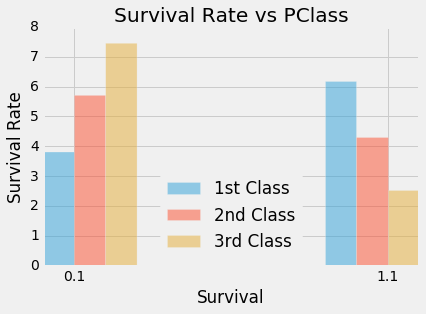

In [237]:
plt.hist(df['survived'][df['pclass'] == 1]+0.0, alpha=0.5, label='1st Class', normed=True);
plt.hist(df['survived'][df['pclass'] == 2]+0.1, alpha=0.5, label='2nd Class', normed=True);
plt.hist(df['survived'][df['pclass'] == 3]+0.2, alpha=0.5, label='3rd Class', normed=True);
plt.title('Survival Rate vs PClass')
plt.legend(loc=0)
plt.xticks([0.1, 1.1])
plt.xlabel('Survival')
plt.ylabel('Survival Rate')

In [238]:
correct0 = 0
for i in range(len(X0)):
    predict_me0  = np.array(X0[i].astype(float))
    predict_me0  = predict_me0.reshape(-1, len(predict_me0))
    prediction0  = kmeans0.predict(predict_me0)
    
    if prediction0[0] == y0[i]:
        correct0 += 1

accuracy0    = float(correct0) / len(X0)
if accuracy0 < 0.5:
    accuracy0 = 1 - accuracy0

print accuracy0

0.502673796791


This is **not** a good result.  We might want to try to pre-process (i.e. rescale or normalize)

In [506]:
X1  = preprocessing.scale(X0)
y1  = y0

kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X1)

correct1 = 0
for i in range(len(X1)):
    predict_me1  = np.array(X1[i].astype(float))
    predict_me1  = predict_me1.reshape(-1, len(predict_me1))
    prediction1  = kmeans1.predict(predict_me1)
    
    if prediction1[0] == y1[i]:
        correct1 += 1

accuracy1    = float(correct1) / len(X1)
if accuracy1 < 0.5:
    accuracy1 = 1 - accuracy1

print accuracy1

0.687547746371


---

---
# Developing our own KMeans Clustering Algorithm

--- Starting from previous code in part 34 ---

Note that using the training data to predict (not test!) is *okay* because the end result of clustering is a set of centroids for each class. Therefore, if we check what each class our data is in, we are just labeling our input data.


Might want to shuffle the data and re-cluster, especially in case of hitting max_iter or bad solutions

In [325]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

import numpy as np
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 12,12

In [413]:
class K_means(object):
    def __init__(self, k=2, tol=1e-6, max_iter=300):
        self.k          = k
        self.tol        = tol
        self.max_iter   = max_iter
    
    def fit(self, data):
        self.centroids  = {}
        
        for i in range(self.k):
            self.centroids[i] = data[np.random.randint(0, data.shape[0])]#[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            for featureset in data:
                distances      = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                pass
            
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid  = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
        
        else:
            raise Exception, '`max_iter` has been triggered'
    
    def predict(self,data):
        distances      = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [414]:
X   = np.array([[1,2],
                [1.5, 1.8],
                [5, 8],
                [8,8],
                [1,0.6],
                [9,11]])

# import random
# width   = 10.0
# nPts    = 1e3
# X       = np.random.normal(0,1,(nPts,2))
# for k in range(X.shape[0]):
#     X[k,0]  += random.randint(-1, 1)*width
#     X[k,1]  += random.randint(-1, 1)*width

In [415]:
np.random.seed(42)
ourkmeans   = K_means(k=2, tol=1e-5)
ourkmeans.fit(X)

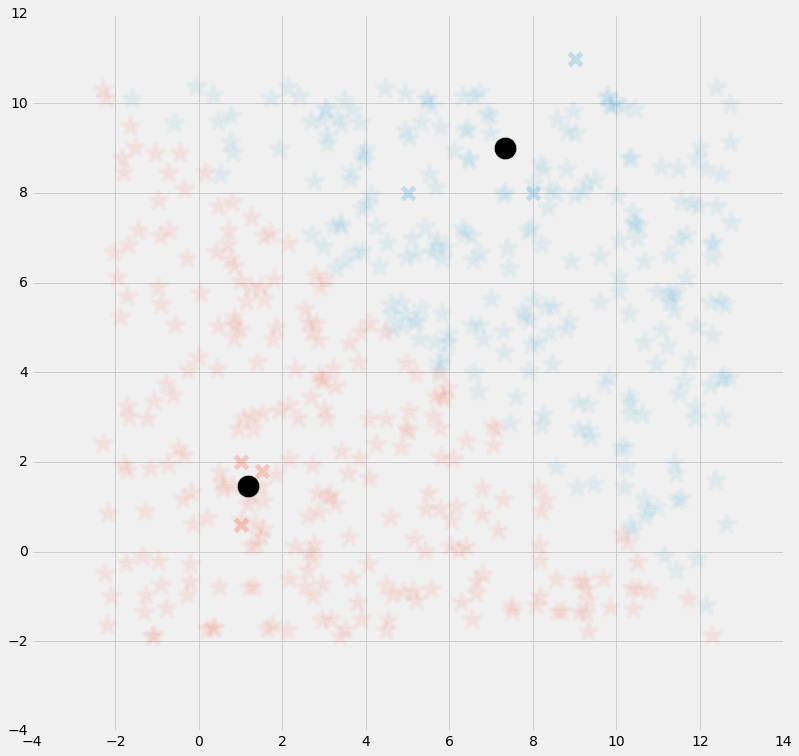

In [416]:
colors      = 10*plt.rcParams['axes.color_cycle']

for classification in ourkmeans.classifications:
    color = colors[classification]
    for featureset in ourkmeans.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, lw=5, alpha=0.25)


# unknowns    = np.array([[1,3],
#                         [8,9],
#                         [0,3],
#                         [5,4],
#                         [6,4]])

xminmin = +np.inf
xmaxmax = -np.inf
yminmin = +np.inf
ymaxmax = -np.inf

y,x = 0,1
for c in ourkmeans.centroids:
    yminmin = min([ourkmeans.centroids[c][y], yminmin])
    ymaxmax = max([ourkmeans.centroids[c][y], ymaxmax])
    xminmin = min([ourkmeans.centroids[c][x], xminmin])
    xmaxmax = max([ourkmeans.centroids[c][x], xmaxmax])

xdist = abs(xmaxmax - xminmin)
ydist = abs(ymaxmax - yminmin)

unknowns    = np.random.uniform((xminmin - 0.5*xdist, yminmin - 0.5*ydist), 
                                (xmaxmax + 0.5*xdist, ymaxmax + 0.5*ydist), 
                                (500,2))

for unknown in unknowns:
    classification = ourkmeans.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=300, lw=5, alpha=0.05)


for centroid in ourkmeans.centroids:
    plt.scatter(ourkmeans.centroids[centroid][0], ourkmeans.centroids[centroid][1], marker='o', c='k', s=500)

---
Compare to SKLearn with Titanic Data Set
---

In [529]:
ourkmeans1 = K_means(k=2)
ourkmeans1.fit(X1)

correct2 = 0
for i in range(len(X1)):
    predict_me2  = np.array(X1[i].astype(float))
    predict_me2  = predict_me2.reshape(-1, len(predict_me2))
    prediction2  = ourkmeans1.predict(predict_me2)
    
    if prediction2 == y1[i]:
        correct2 += 1

accuracy2    = float(correct2) / len(X1)
if accuracy2 < 0.5:
    accuracy2 = 1 - accuracy2

print accuracy1, accuracy2

0.687547746371 0.687547746371


---
# My Notes

It might be useful to iterate over cross_validation train-test split to compare two++ runs of kmeans to ensure that the clusters are indeed matched well.

- Remember what happened when I kmeans classified 9 gaussian balls in 2D space
    - my own classifier hit the target 3 out 5 times
    - to reduce this, run the kmeans "twice" (iterate) and compare the centers from try 1 to try 2
    - and then from try 2 to try 1